# Circuit CS_R_1

In [17]:
from villas.dataprocessing.dpsim import *
from villas.dataprocessing.plottools import *
from villas.dataprocessing.timeseries import *

## DPsim EMT

In [18]:
# working directory
work_dir_emt = '../dpsim/build/Examples/Cxx/Logs/'

In [19]:
# read log file
logName_emt = 'EMT_CS_R_1_LeftVector'
print(work_dir_emt + logName_emt + '.csv')
ts_dpsim_emt = read_timeseries_dpsim(work_dir_emt + logName_emt + '.csv')

../dpsim/build/Examples/Cxx/Logs/EMT_CS_R_1_LeftVector.csv
DPsim results real column names: ['node00000']
DPsim results complex column names: []
DPsim results variable number: 1
DPsim results length: 1000


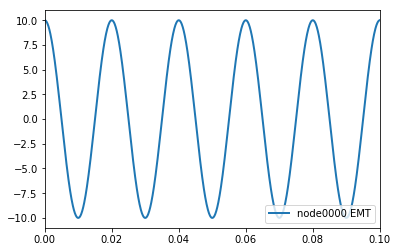

In [20]:
set_timeseries_labels(ts_dpsim_emt[0], 'node0000 EMT')
plot_timeseries(1, ts_dpsim_emt[0])

## DPsim DP

In [21]:
# working directory
work_dir_orig = '../dpsim/build/Examples/Cxx/Logs/'

In [22]:
# read log file
logName_orig = 'DP_CS_R_1_LeftVector'
print(work_dir_orig + logName_orig + '.csv')
ts_dpsim_orig = read_timeseries_dpsim(work_dir_orig + logName_orig + '.csv')

../dpsim/build/Examples/Cxx/Logs/DP_CS_R_1_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000']
DPsim results variable number: 1
DPsim results length: 1000


In [23]:
phasors_orig = get_node_voltage_phasors(ts_dpsim_orig)
for node, phasor in phasors_orig.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 10.0<0.0


In [24]:
#convert to emt
emt_orig = get_node_emt_voltages(ts_dpsim_orig, 50)

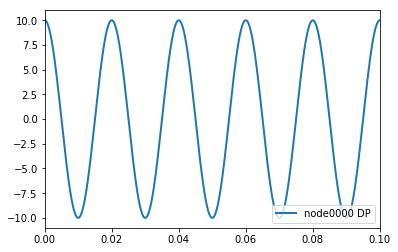

In [25]:
set_timeseries_labels(emt_orig['node00000'], 'node0000 DP')
plot_timeseries(1, emt_orig['node00000'])

## Simulink reference results

In [26]:
# read Simulink log file
work_dir_ref = '../results/Simulink/Circuits/'

In [27]:
#logName_ref = 'Smlnk_CS_R_1'
logName_ref = 'SL_ResVS_RL2'
print(work_dir_ref + logName_ref + '.csv')
ts_ref = read_timeseries_simulink(work_dir_ref + logName_ref + '.csv')

../results/Simulink/Circuits/SL_ResVS_RL2.csv
Simulink results column names: ['e1', 'e2']
Simulink results number: 2


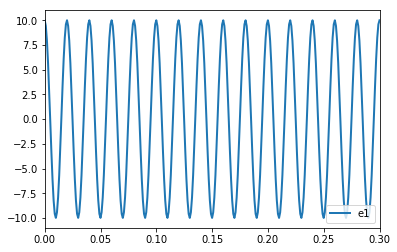

In [28]:
plot_timeseries(1, ts_ref[0])

## Comparison

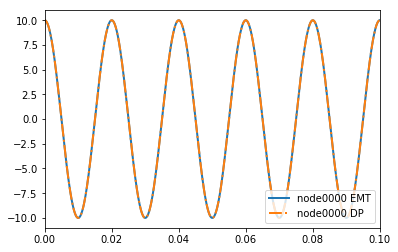

In [29]:
# plot the results together
plot_timeseries(1, ts_dpsim_emt[0])
plot_timeseries(1, emt_orig['node00000'], '-.')
#plot_timeseries(1, ts_ref[0])

In [30]:
# calculate the RMSE between Simulink -> ts_ref and EMT -> ts_dpsim_emt
err_ref_emt = 0
err_ref_emt += TimeSeries.rmse(ts_ref[0], ts_dpsim_emt[0])
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_ref_emt))

Total RMSE of Simulink reference and DPsim EMT: 4.94325


In [31]:
# calculate the RMSE between Simulink -> ts_ref and DP -> emt_orig
err_ref_dp = 0
err_ref_dp += TimeSeries.rmse(ts_ref[0], emt_orig['node00000'])
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_ref_dp))

Total RMSE of Simulink reference and DPsim DP: 4.94325


In [32]:
# calculate the RMSE between EMT -> ts_dpsim_emt and DP -> emt_orig
err_emt_dp = 0
err_emt_dp += TimeSeries.rmse(ts_dpsim_emt[0], emt_orig['node00000'])
print("Total RMSE of DPsim EMT and DPsim DP: %g" % (err_emt_dp))

Total RMSE of DPsim EMT and DPsim DP: 2.7136e-07
